In [1]:
import pandas as pd

In [2]:
perguntas = pd.read_excel('dados/Formulario Avaliacao de Risco - Respostas Anonimizadas 2.xlsx', sheet_name='Formularios Avaliacao Risco')
perguntas.head()

,Formulario,Pergunta,Resposta,Pontos,Complemento
0,1,O(A) agressor(a) já ameaçou você ou algum fami...,Não,0,NaN
1,1,O(A) agressor(a) já praticou alguma(s) destas ...,Soco,1,NaN
2,1,O(A) agressor(a) já praticou alguma(s) destas ...,Tapa,1,NaN
3,1,O(A) agressor(a) já praticou alguma(s) destas ...,Empurrão,1,NaN
4,1,Você necessitou de atendimento médico e/ou int...,Não,0,NaN


In [3]:
perguntas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650779 entries, 0 to 650778
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Formulario   650779 non-null  int64 
 1   Pergunta     650779 non-null  object
 2   Resposta     650779 non-null  object
 3   Pontos       650779 non-null  int64 
 4   Complemento  21767 non-null   object
dtypes: int64(2), object(3)
memory usage: 24.8+ MB


In [4]:
perguntas.drop(['Complemento', 'Pontos'], axis=1, inplace=True)

In [5]:
perguntas_entrevistador = ['Durante o atendimento, a vítima demonstra percepção de risco sobre sua situação? A percepção é de existência ou inexistência do risco? (por exemplo, ela diz que o agressor pode matá-la, ou ela justifica o comportamento do agressor ou naturaliza o comportamento violento?). Anote a percepção e explique.',
'Existem outras informações relevantes com relação ao contexto ou situação da vítima e que possam indicar risco de novas agressões? (Por exemplo, a vítima tem novo(a) companheiro(a) ou tomou decisões que anunciam um rompimento definitivo com o agressor (pretende mudar de casa, bairro, cidade).',
'Tem sinais de esgotamento emocional?',  'Está tomando medicação controlada?',  'Necessita de acompanhamento psicológico e/ou psiquiátrico?','Existe o risco de a vítima tentar suicídio ou existem informações de que tenha tentado se matar?', 'A vítima ainda reside com o(a) agressor(a) ou ele tem acesso fácil à sua residência?']
print(len(perguntas_entrevistador))

7


In [6]:
perguntas_vitima = [pergunta for pergunta in perguntas.Pergunta.unique() if pergunta not in perguntas_entrevistador]

In [7]:
perguntas.Pergunta.value_counts()

Pergunta
O(A) agressor(a) já praticou alguma(s) destas agressões físicas contra você?                                                                                                                                                                                                                                      56827
O(A) agressor(a) já teve algum destes comportamentos?                                                                                                                                                                                                                                                             52601
O(A) agressor(a) já ameaçou ou agrediu seus filhos, outros familiares, amigos, colegas de trabalho, pessoas desconhecidas ou animais?                                                                                                                                                                             22999
O(A) agressor(a) faz uso abusivo de álcool ou de drogas

In [8]:
perguntas['pergunta_resposta'] = perguntas.Pergunta + '_' + perguntas.Resposta
perguntas.head()

,Formulario,Pergunta,Resposta,pergunta_resposta
0,1,O(A) agressor(a) já ameaçou você ou algum fami...,Não,O(A) agressor(a) já ameaçou você ou algum fami...
1,1,O(A) agressor(a) já praticou alguma(s) destas ...,Soco,O(A) agressor(a) já praticou alguma(s) destas ...
2,1,O(A) agressor(a) já praticou alguma(s) destas ...,Tapa,O(A) agressor(a) já praticou alguma(s) destas ...
3,1,O(A) agressor(a) já praticou alguma(s) destas ...,Empurrão,O(A) agressor(a) já praticou alguma(s) destas ...
4,1,Você necessitou de atendimento médico e/ou int...,Não,Você necessitou de atendimento médico e/ou int...


In [9]:
df_perguntas_vitima = perguntas[~perguntas.Pergunta.isin(perguntas_entrevistador)]

df_encoded = pd.get_dummies(df_perguntas_vitima, columns=['pergunta_resposta'], prefix='pergunta', dtype=int, drop_first=True)

df_encoded.head()

,Formulario,Pergunta,Resposta,pergunta_Algum de seus filhos é pessoa com deficiência?_Não se aplica,pergunta_Algum de seus filhos é pessoa com deficiência?_Não sei/Não respondeu,pergunta_Algum de seus filhos é pessoa com deficiência?_Não tenho filhos,pergunta_Algum de seus filhos é pessoa com deficiência?_Sim,pergunta_As ameaças ou agressões físicas do(a) agressor(a) contra você se tornaram mais frequentes ou mais graves nos últimos meses?_Não,pergunta_As ameaças ou agressões físicas do(a) agressor(a) contra você se tornaram mais frequentes ou mais graves nos últimos meses?_Não se aplica,pergunta_As ameaças ou agressões físicas do(a) agressor(a) contra você se tornaram mais frequentes ou mais graves nos últimos meses?_Não sei/Não respondeu,...,"pergunta_Você se separou recentemente do(a) agressor(a), tentou ou manifestou intenção de se separar?_Sim",pergunta_Você sofreu algum tipo de violência durante a gravidez ou nos três meses posteriores ao parto?_Não,pergunta_Você sofreu algum tipo de violência durante a gravidez ou nos três meses posteriores ao parto?_Não se aplica,pergunta_Você sofreu algum tipo de violência durante a gravidez ou nos três meses posteriores ao parto?_Não sei/Não respondeu,pergunta_Você sofreu algum tipo de violência durante a gravidez ou nos três meses posteriores ao parto?_Sim,pergunta_Você tem filhos?_Não,pergunta_Você tem filhos?_Não se aplica,pergunta_Você tem filhos?_Não sei/Não respondeu,"pergunta_Você tem filhos?_Sim, com o(a) agressor(a)","pergunta_Você tem filhos?_Sim, de outro relacionamento"
0,1,O(A) agressor(a) já ameaçou você ou algum fami...,Não,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,O(A) agressor(a) já praticou alguma(s) destas ...,Soco,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,O(A) agressor(a) já praticou alguma(s) destas ...,Tapa,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,O(A) agressor(a) já praticou alguma(s) destas ...,Empurrão,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,Você necessitou de atendimento médico e/ou int...,Não,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df_grouped = df_encoded.groupby("Formulario").max().reset_index()


df_encoded = df_grouped.drop(['Formulario', 'Pergunta', 'Resposta'], axis=1)
df_encoded.head()

,pergunta_Algum de seus filhos é pessoa com deficiência?_Não se aplica,pergunta_Algum de seus filhos é pessoa com deficiência?_Não sei/Não respondeu,pergunta_Algum de seus filhos é pessoa com deficiência?_Não tenho filhos,pergunta_Algum de seus filhos é pessoa com deficiência?_Sim,pergunta_As ameaças ou agressões físicas do(a) agressor(a) contra você se tornaram mais frequentes ou mais graves nos últimos meses?_Não,pergunta_As ameaças ou agressões físicas do(a) agressor(a) contra você se tornaram mais frequentes ou mais graves nos últimos meses?_Não se aplica,pergunta_As ameaças ou agressões físicas do(a) agressor(a) contra você se tornaram mais frequentes ou mais graves nos últimos meses?_Não sei/Não respondeu,pergunta_As ameaças ou agressões físicas do(a) agressor(a) contra você se tornaram mais frequentes ou mais graves nos últimos meses?_Sim,pergunta_Com qual cor/raça você se identifica:_Amarela/oriental,pergunta_Com qual cor/raça você se identifica:_Branca,...,"pergunta_Você se separou recentemente do(a) agressor(a), tentou ou manifestou intenção de se separar?_Sim",pergunta_Você sofreu algum tipo de violência durante a gravidez ou nos três meses posteriores ao parto?_Não,pergunta_Você sofreu algum tipo de violência durante a gravidez ou nos três meses posteriores ao parto?_Não se aplica,pergunta_Você sofreu algum tipo de violência durante a gravidez ou nos três meses posteriores ao parto?_Não sei/Não respondeu,pergunta_Você sofreu algum tipo de violência durante a gravidez ou nos três meses posteriores ao parto?_Sim,pergunta_Você tem filhos?_Não,pergunta_Você tem filhos?_Não se aplica,pergunta_Você tem filhos?_Não sei/Não respondeu,"pergunta_Você tem filhos?_Sim, com o(a) agressor(a)","pergunta_Você tem filhos?_Sim, de outro relacionamento"
0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,1,...,1,1,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1


In [21]:
perguntas_teste = perguntas.groupby('Formulario').max().reset_index()

In [22]:
df_encoded = pd.get_dummies(perguntas_teste, columns=['pergunta_resposta'], prefix='pergunta', dtype=int, drop_first=True)
df_encoded

,Formulario,Pergunta,Resposta,pergunta_Tem sinais de esgotamento emocional?_Não tem sinais de esgotamento emocional,pergunta_Tem sinais de esgotamento emocional?_Tem sinais de esgotamento emocional,pergunta_Você necessitou de atendimento médico e/ou internação após alguma(s) dessa(s) agressão(ões)?_Não,pergunta_Você quer e aceita abrigamento temporário?_Não,pergunta_Você se considera dependente financeiramente do(a) agressor(a)?_Não,"pergunta_Você se separou recentemente do(a) agressor(a), tentou ou manifestou intenção de se separar?_Sim",pergunta_Você sofreu algum tipo de violência durante a gravidez ou nos três meses posteriores ao parto?_Não,pergunta_Você sofreu algum tipo de violência durante a gravidez ou nos três meses posteriores ao parto?_Não se aplica,pergunta_Você sofreu algum tipo de violência durante a gravidez ou nos três meses posteriores ao parto?_Não sei/Não respondeu,pergunta_Você sofreu algum tipo de violência durante a gravidez ou nos três meses posteriores ao parto?_Sim,pergunta_Você tem filhos?_Não,pergunta_Você tem filhos?_Não se aplica,pergunta_Você tem filhos?_Não sei/Não respondeu,"pergunta_Você tem filhos?_Sim, com o(a) agressor(a)","pergunta_Você tem filhos?_Sim, de outro relacionamento"
0,1,Você tem filhos?,Teve outros comportamentos de ciúme excessivo ...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2,Você tem filhos?,Tapa,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,3,Você tem filhos?,Teve outros comportamentos de ciúme excessivo ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,Você tem filhos?,Teve outros comportamentos de ciúme excessivo ...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,5,Você tem filhos?,Teve outros comportamentos de ciúme excessivo ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16514,16590,Você tem filhos?,Teve outros comportamentos de ciúme excessivo ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
16515,16591,Você tem filhos?,Teve outros comportamentos de ciúme excessivo ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
16516,16592,Você tem filhos?,Teve outros comportamentos de ciúme excessivo ...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
16517,16593,Você tem filhos?,Teve outros comportamentos de ciúme excessivo ...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [27]:
df_pivot = perguntas.pivot(index="Formulario", columns="pergunta_resposta", values="Resposta").reset_index()


In [28]:
df_pivot

pergunta_resposta,Formulario,A vítima ainda reside com o(a) agressor(a) ou ele tem acesso fácil à sua residência?_Não,A vítima ainda reside com o(a) agressor(a) ou ele tem acesso fácil à sua residência?_Não sabe,A vítima ainda reside com o(a) agressor(a) ou ele tem acesso fácil à sua residência?_Não se aplica,"A vítima ainda reside com o(a) agressor(a) ou ele tem acesso fácil à sua residência?_Sim, ainda reside com o(a) agressor(a)","A vítima ainda reside com o(a) agressor(a) ou ele tem acesso fácil à sua residência?_Sim, o(a) agressor(a) tem fácil acesso à sua residência.",Algum de seus filhos é pessoa com deficiência?_Não,Algum de seus filhos é pessoa com deficiência?_Não se aplica,Algum de seus filhos é pessoa com deficiência?_Não sei/Não respondeu,Algum de seus filhos é pessoa com deficiência?_Não tenho filhos,...,"Você se separou recentemente do(a) agressor(a), tentou ou manifestou intenção de se separar?_Sim",Você sofreu algum tipo de violência durante a gravidez ou nos três meses posteriores ao parto?_Não,Você sofreu algum tipo de violência durante a gravidez ou nos três meses posteriores ao parto?_Não se aplica,Você sofreu algum tipo de violência durante a gravidez ou nos três meses posteriores ao parto?_Não sei/Não respondeu,Você sofreu algum tipo de violência durante a gravidez ou nos três meses posteriores ao parto?_Sim,Você tem filhos?_Não,Você tem filhos?_Não se aplica,Você tem filhos?_Não sei/Não respondeu,"Você tem filhos?_Sim, com o(a) agressor(a)","Você tem filhos?_Sim, de outro relacionamento"
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Sim, com o(a) agressor(a)",NaN
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Não,NaN,NaN,NaN,Não,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,Não,NaN,NaN,NaN,...,Sim,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Sim, de outro relacionamento"
3,4,NaN,NaN,NaN,NaN,NaN,Não,NaN,NaN,NaN,...,NaN,Não,NaN,NaN,NaN,NaN,NaN,NaN,"Sim, com o(a) agressor(a)",NaN
4,5,NaN,NaN,NaN,NaN,NaN,Não,NaN,NaN,NaN,...,Sim,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Sim, de outro relacionamento"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16514,16590,Não,NaN,NaN,NaN,NaN,Não,NaN,NaN,NaN,...,Sim,NaN,Não se aplica,NaN,NaN,NaN,NaN,NaN,NaN,"Sim, de outro relacionamento"
16515,16591,NaN,NaN,NaN,NaN,NaN,Não,NaN,NaN,NaN,...,Sim,NaN,NaN,NaN,Sim,NaN,NaN,NaN,NaN,"Sim, de outro relacionamento"
16516,16592,NaN,NaN,NaN,"Sim, ainda reside com o(a) agressor(a)",NaN,Não,NaN,NaN,NaN,...,Sim,NaN,NaN,NaN,Sim,NaN,NaN,NaN,"Sim, com o(a) agressor(a)",NaN
16517,16593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sim,NaN,NaN,NaN,Sim,NaN,NaN,NaN,"Sim, com o(a) agressor(a)",NaN


In [34]:
df_dummies = pd.get_dummies(df_pivot, dtype=int, dummy_na=True)


In [35]:
df_dummies

,Formulario,A vítima ainda reside com o(a) agressor(a) ou ele tem acesso fácil à sua residência?_Não_Não,A vítima ainda reside com o(a) agressor(a) ou ele tem acesso fácil à sua residência?_Não_nan,A vítima ainda reside com o(a) agressor(a) ou ele tem acesso fácil à sua residência?_Não sabe_Não sabe,A vítima ainda reside com o(a) agressor(a) ou ele tem acesso fácil à sua residência?_Não sabe_nan,A vítima ainda reside com o(a) agressor(a) ou ele tem acesso fácil à sua residência?_Não se aplica_Não se aplica,A vítima ainda reside com o(a) agressor(a) ou ele tem acesso fácil à sua residência?_Não se aplica_nan,"A vítima ainda reside com o(a) agressor(a) ou ele tem acesso fácil à sua residência?_Sim, ainda reside com o(a) agressor(a)_Sim, ainda reside com o(a) agressor(a)","A vítima ainda reside com o(a) agressor(a) ou ele tem acesso fácil à sua residência?_Sim, ainda reside com o(a) agressor(a)_nan","A vítima ainda reside com o(a) agressor(a) ou ele tem acesso fácil à sua residência?_Sim, o(a) agressor(a) tem fácil acesso à sua residência._Sim, o(a) agressor(a) tem fácil acesso à sua residência.",...,Você tem filhos?_Não_Não,Você tem filhos?_Não_nan,Você tem filhos?_Não se aplica_Não se aplica,Você tem filhos?_Não se aplica_nan,Você tem filhos?_Não sei/Não respondeu_Não sei/Não respondeu,Você tem filhos?_Não sei/Não respondeu_nan,"Você tem filhos?_Sim, com o(a) agressor(a)_Sim, com o(a) agressor(a)","Você tem filhos?_Sim, com o(a) agressor(a)_nan","Você tem filhos?_Sim, de outro relacionamento_Sim, de outro relacionamento","Você tem filhos?_Sim, de outro relacionamento_nan"
0,1,0,1,0,1,0,1,0,1,0,...,0,1,0,1,0,1,1,0,0,1
1,2,0,1,0,1,0,1,0,1,0,...,1,0,0,1,0,1,0,1,0,1
2,3,0,1,0,1,0,1,0,1,0,...,0,1,0,1,0,1,0,1,1,0
3,4,0,1,0,1,0,1,0,1,0,...,0,1,0,1,0,1,1,0,0,1
4,5,0,1,0,1,0,1,0,1,0,...,0,1,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16514,16590,1,0,0,1,0,1,0,1,0,...,0,1,0,1,0,1,0,1,1,0
16515,16591,0,1,0,1,0,1,0,1,0,...,0,1,0,1,0,1,0,1,1,0
16516,16592,0,1,0,1,0,1,1,0,0,...,0,1,0,1,0,1,1,0,0,1
16517,16593,0,1,0,1,0,1,0,1,0,...,0,1,0,1,0,1,1,0,0,1


In [40]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df_kmeans = df_dummies.copy()
df_kmeans.drop('Formulario', axis=1, inplace=True)
# Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df_kmeans['cluster'] = kmeans.fit_predict(df_kmeans)


In [41]:
df_kmeans['Formulario'] = df_dummies.Formulario

In [42]:
df_kmeans.head()

,A vítima ainda reside com o(a) agressor(a) ou ele tem acesso fácil à sua residência?_Não_Não,A vítima ainda reside com o(a) agressor(a) ou ele tem acesso fácil à sua residência?_Não_nan,A vítima ainda reside com o(a) agressor(a) ou ele tem acesso fácil à sua residência?_Não sabe_Não sabe,A vítima ainda reside com o(a) agressor(a) ou ele tem acesso fácil à sua residência?_Não sabe_nan,A vítima ainda reside com o(a) agressor(a) ou ele tem acesso fácil à sua residência?_Não se aplica_Não se aplica,A vítima ainda reside com o(a) agressor(a) ou ele tem acesso fácil à sua residência?_Não se aplica_nan,"A vítima ainda reside com o(a) agressor(a) ou ele tem acesso fácil à sua residência?_Sim, ainda reside com o(a) agressor(a)_Sim, ainda reside com o(a) agressor(a)","A vítima ainda reside com o(a) agressor(a) ou ele tem acesso fácil à sua residência?_Sim, ainda reside com o(a) agressor(a)_nan","A vítima ainda reside com o(a) agressor(a) ou ele tem acesso fácil à sua residência?_Sim, o(a) agressor(a) tem fácil acesso à sua residência._Sim, o(a) agressor(a) tem fácil acesso à sua residência.","A vítima ainda reside com o(a) agressor(a) ou ele tem acesso fácil à sua residência?_Sim, o(a) agressor(a) tem fácil acesso à sua residência._nan",...,Você tem filhos?_Não se aplica_Não se aplica,Você tem filhos?_Não se aplica_nan,Você tem filhos?_Não sei/Não respondeu_Não sei/Não respondeu,Você tem filhos?_Não sei/Não respondeu_nan,"Você tem filhos?_Sim, com o(a) agressor(a)_Sim, com o(a) agressor(a)","Você tem filhos?_Sim, com o(a) agressor(a)_nan","Você tem filhos?_Sim, de outro relacionamento_Sim, de outro relacionamento","Você tem filhos?_Sim, de outro relacionamento_nan",cluster,Formulario
0,0,1,0,1,0,1,0,1,0,1,...,0,1,0,1,1,0,0,1,2,1
1,0,1,0,1,0,1,0,1,0,1,...,0,1,0,1,0,1,0,1,2,2
2,0,1,0,1,0,1,0,1,0,1,...,0,1,0,1,0,1,1,0,2,3
3,0,1,0,1,0,1,0,1,0,1,...,0,1,0,1,1,0,0,1,2,4
4,0,1,0,1,0,1,0,1,0,1,...,0,1,0,1,0,1,1,0,2,5


In [43]:
df_kmeans.cluster.value_counts()

cluster
1    6870
2    6520
0    3129
Name: count, dtype: int64

In [44]:
pontuacoes = pd.read_excel('dados/Formulario Avaliacao de Risco - Respostas Anonimizadas 2.xlsx', sheet_name='Pontos por Formulario')
pontuacoes.head()

,Formulario,Pontuação Total
0,1,16
1,2,11
2,3,14
3,4,14
4,5,18


In [45]:
df_merged = pd.merge(df_kmeans, pontuacoes, on='Formulario', how='inner')
df_merged.head()

,A vítima ainda reside com o(a) agressor(a) ou ele tem acesso fácil à sua residência?_Não_Não,A vítima ainda reside com o(a) agressor(a) ou ele tem acesso fácil à sua residência?_Não_nan,A vítima ainda reside com o(a) agressor(a) ou ele tem acesso fácil à sua residência?_Não sabe_Não sabe,A vítima ainda reside com o(a) agressor(a) ou ele tem acesso fácil à sua residência?_Não sabe_nan,A vítima ainda reside com o(a) agressor(a) ou ele tem acesso fácil à sua residência?_Não se aplica_Não se aplica,A vítima ainda reside com o(a) agressor(a) ou ele tem acesso fácil à sua residência?_Não se aplica_nan,"A vítima ainda reside com o(a) agressor(a) ou ele tem acesso fácil à sua residência?_Sim, ainda reside com o(a) agressor(a)_Sim, ainda reside com o(a) agressor(a)","A vítima ainda reside com o(a) agressor(a) ou ele tem acesso fácil à sua residência?_Sim, ainda reside com o(a) agressor(a)_nan","A vítima ainda reside com o(a) agressor(a) ou ele tem acesso fácil à sua residência?_Sim, o(a) agressor(a) tem fácil acesso à sua residência._Sim, o(a) agressor(a) tem fácil acesso à sua residência.","A vítima ainda reside com o(a) agressor(a) ou ele tem acesso fácil à sua residência?_Sim, o(a) agressor(a) tem fácil acesso à sua residência._nan",...,Você tem filhos?_Não se aplica_nan,Você tem filhos?_Não sei/Não respondeu_Não sei/Não respondeu,Você tem filhos?_Não sei/Não respondeu_nan,"Você tem filhos?_Sim, com o(a) agressor(a)_Sim, com o(a) agressor(a)","Você tem filhos?_Sim, com o(a) agressor(a)_nan","Você tem filhos?_Sim, de outro relacionamento_Sim, de outro relacionamento","Você tem filhos?_Sim, de outro relacionamento_nan",cluster,Formulario,Pontuação Total
0,0,1,0,1,0,1,0,1,0,1,...,1,0,1,1,0,0,1,2,1,16
1,0,1,0,1,0,1,0,1,0,1,...,1,0,1,0,1,0,1,2,2,11
2,0,1,0,1,0,1,0,1,0,1,...,1,0,1,0,1,1,0,2,3,14
3,0,1,0,1,0,1,0,1,0,1,...,1,0,1,1,0,0,1,2,4,14
4,0,1,0,1,0,1,0,1,0,1,...,1,0,1,0,1,1,0,2,5,18


In [47]:
medias_por_cluster = df_merged.groupby('cluster')['Pontuação Total'].mean().reset_index()
medias_por_cluster['cores'] = ['r','g','b']

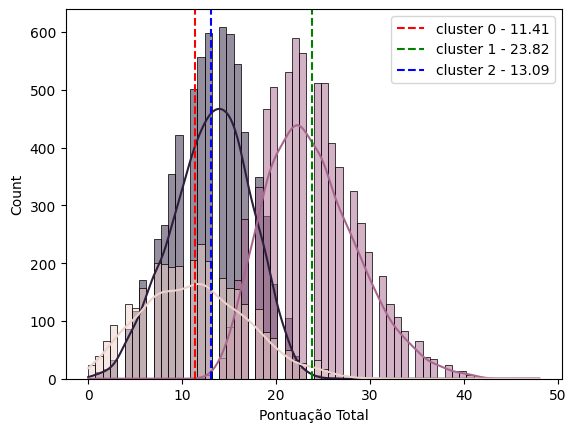

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_merged, x='Pontuação Total', hue='cluster', kde=True)

for i, row in medias_por_cluster.iterrows():
  plt.axvline(x=row["Pontuação Total"], color=row['cores'], linestyle='--', label=f'cluster {row["cluster"]} - {round(row["Pontuação Total"],2)}')

plt.legend()

plt.show()

# Clustering com PCA

In [50]:
from sklearn.decomposition import PCA

df_pca = df_dummies.copy().drop('Formulario',axis=1)

pca = PCA()

X_pca = pca.fit_transform(df_pca)


In [52]:
import numpy as np

cumulative_variance = np.cumsum(pca.explained_variance_ratio_) # DETERMINAR O NUMERO IDEAL DE COMPONENTES
n_components = np.argmax(cumulative_variance >= 0.95) + 1  # 95% de variância
print(f"Número de componentes para 95% de variância: {n_components}")

Número de componentes para 95% de variância: 89


In [53]:
pca = PCA(n_components=89)

X_pca = pca.fit_transform(df_pca)

In [56]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
y_cluster = kmeans.fit_predict(X_pca)

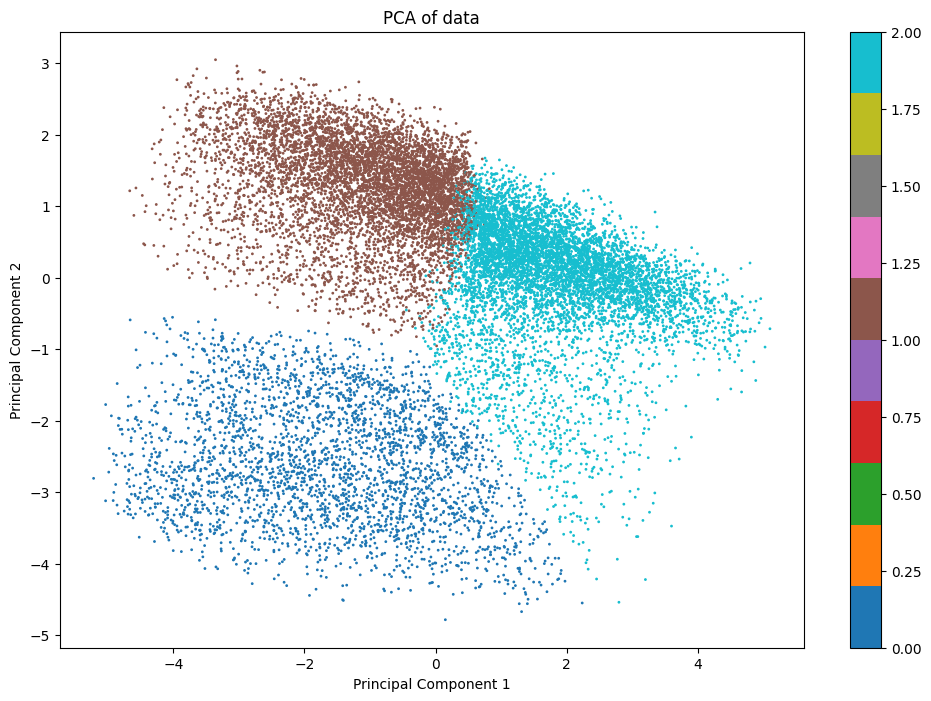

In [57]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_cluster.astype(int), cmap='tab10', s=1)
plt.colorbar(scatter)
plt.title('PCA of data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [59]:
indexes_perguntas = [f'qa_{n}' for n in range(89)]

df_kpca = pd.DataFrame(X_pca, columns=indexes_perguntas)

In [61]:
df_kpca['Formulario'] = df_dummies.Formulario

In [62]:
df_merged = pd.merge(df_kpca, pontuacoes, on='Formulario', how='inner')
df_merged.head()

,qa_0,qa_1,qa_2,qa_3,qa_4,qa_5,qa_6,qa_7,qa_8,qa_9,...,qa_81,qa_82,qa_83,qa_84,qa_85,qa_86,qa_87,qa_88,Formulario,Pontuação Total
0,-0.903920,1.664224,-1.122365,0.286234,0.166375,0.857122,-0.970083,0.307966,0.514942,-1.757267,...,-0.096797,-0.020638,0.113292,-0.199924,-0.206949,-0.017336,-0.277673,0.177803,1,16
1,-1.789965,0.819232,-1.455844,-0.387843,1.738164,-0.514409,-0.699022,-0.662223,-0.725226,-0.729119,...,0.336662,-0.009934,-1.122559,0.225456,-0.261048,-0.947396,0.130712,-0.313496,2,11
2,-1.181155,1.435129,-1.333997,-2.045370,-0.134014,-0.157739,0.962348,-0.469232,-0.433104,-0.119440,...,-0.025958,0.011854,0.100603,-0.118649,0.138801,-0.031117,-0.103054,0.011535,3,14
3,-0.858142,1.727294,-1.184353,-0.676286,0.813232,-0.618212,-0.932351,-0.685475,1.045923,-1.681388,...,0.061949,0.096638,0.122839,-0.053839,-0.159813,0.114023,0.234395,0.115187,4,14
4,-0.328961,1.198850,-0.846599,-2.383216,-1.499705,-0.612895,0.400649,-1.158600,0.029294,0.392425,...,0.007171,-0.083293,0.194375,0.029086,-0.037363,-0.023203,-0.112219,0.072037,5,18


In [64]:
df_merged['cluster'] = y_cluster

In [65]:
medias_por_cluster = df_merged.groupby('cluster')['Pontuação Total'].mean().reset_index()
medias_por_cluster['cores'] = ['r','g','b']

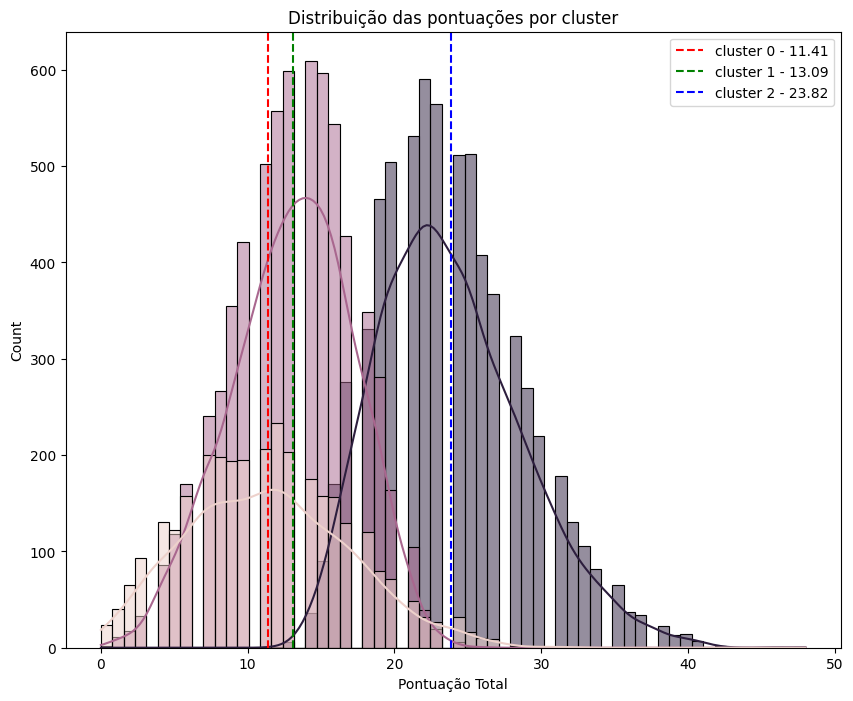

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.histplot(df_merged, x='Pontuação Total', hue='cluster', kde=True)

for i, row in medias_por_cluster.iterrows():
  plt.axvline(x=row["Pontuação Total"], color=row['cores'], linestyle='--', label=f'cluster {row["cluster"]} - {round(row["Pontuação Total"],2)}')

plt.title('Distribuição das pontuações por cluster')
plt.legend()

plt.show()